# Predicting mental health treatment need using machine learning
A classification model that predicts whether a person is likely to seek or need mental health treatment, based on survey responses. The insights can help organizations or clinics identify high-risk groups and encourage early intervention. 

This project will be a full data pipeline (cleaning → EDA → feature engineering → modeling → evaluation).

## 1. Problem definition

Statement
> Given information about an employee's demographics, workplace conditions, and personal history regarding mental health, can we predict whether they are likely to seek treatment for mental health issues?

## 2. Data

The data came from Kaggle - https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

## 3. Evaluation

> If we can achieve at least 85% accuracy in predicting whether a person will seek mental health treatment - along with a recall score above 80% for the positive class — we will consider the model effective and suitable for further development and deployment.

## 4. Features
This shows different information about each of the features in the data.

1. Timestamp
2. Age
3. Gender
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition? (This will be our target variable)
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
24. phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
25. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
27. comments: Any additional notes or comments

### Preparing the tools

I will be using pandas, Matplotlib and NumPy for data analysis and manipulation, and SKLearn for the model

In [83]:
# Import all the tools I need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load the data

In [63]:
df = pd.read_csv("data/mental-health-in-tech-survey.csv")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [65]:
df.shape

(1259, 27)

In [66]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [67]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Data Exploration (exploratory data analysis or EDA)

In [68]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [69]:
df.head().T

,0,1,2,3,4
Timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500


In [70]:
df.Timestamp.dtype

dtype('O')

In [71]:
# Parse data and sort by Timestamp since it's a time series data
df = pd.read_csv("data/mental-health-in-tech-survey.csv", parse_dates=["Timestamp"])
df.sort_values(by=["Timestamp"], inplace=True, ascending=True)

In [72]:
df.Timestamp.dtype

dtype('<M8[ns]')

In [73]:
# Count each set of the target variable
df["treatment"].value_counts()

treatment
Yes    637
No     622
Name: count, dtype: int64

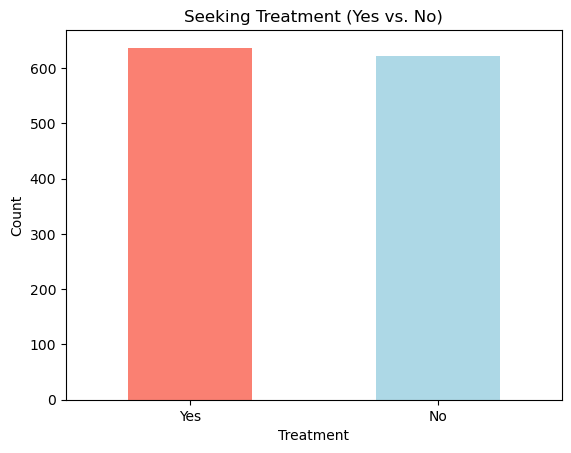

In [74]:
# Distribution of the taget
df["treatment"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Seeking Treatment (Yes vs. No)")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Treatment Frequency according to age

This compares the age column against the treatment column

In [87]:
df.Age.value_counts().sort_index()

Age
-1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 9999999

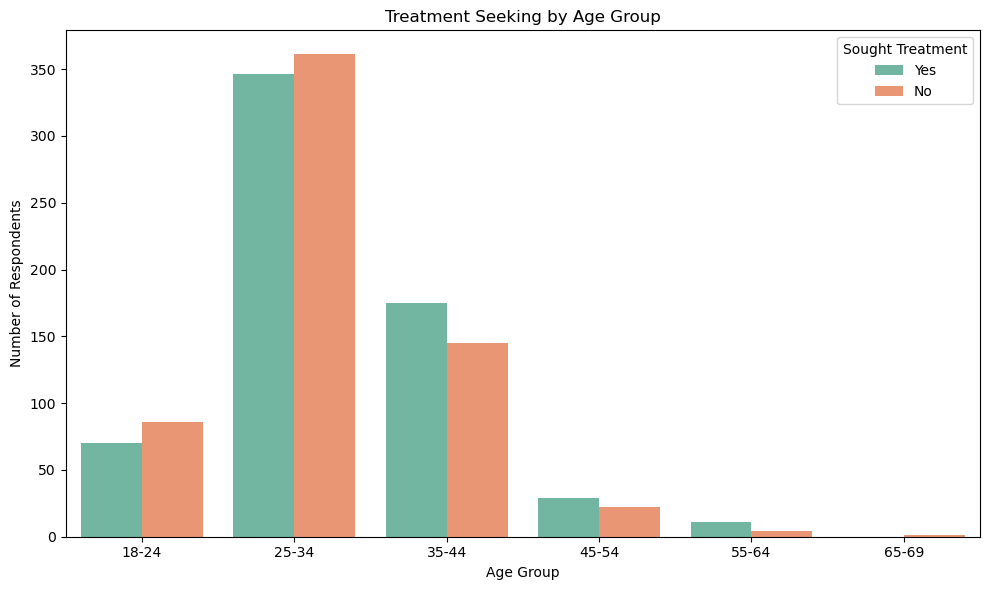

In [84]:
# Duplicate DataFrame before editing
df_tmp = df.copy()

# Clean the Age column - remove outliers
df_tmp = df_tmp[(df_tmp['Age'] > 16) & (df_tmp['Age'] < 70)]

# Create Age groups
bins = [17, 24, 34, 44, 54, 64, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-69']
df_tmp['AgeGroup'] = pd.cut(df_tmp['Age'], bins=bins, labels=labels)

# Plot Age vs. treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x='AgeGroup', hue='treatment', palette='Set2')
plt.title('Treatment Seeking by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Sought Treatment')
plt.tight_layout()
plt.show()

In [90]:
df_tmp.family_history.value_counts()

family_history
No     762
Yes    488
Name: count, dtype: int64

In [91]:
pd.crosstab(df_tmp.treatment, df_tmp.family_history)

family_history,No,Yes
treatment,,
No,492,127
Yes,270,361
